# Ellipsoidal nested rejection sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, arXiv:astro-ph/0508461v2.

First create fake data.

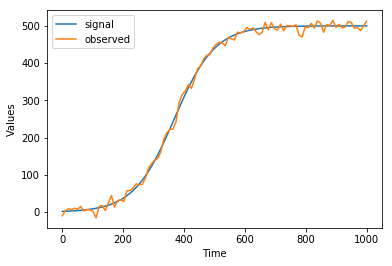

In [12]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedEllipsoidSampler(log_likelihood, log_prior)

# Set number of iterations
sampler.set_iterations(10000)

# Set enlargement factor (a value of 1 means uniformly sample from the minimum volume 
# ellipsoid around sampled points, whereas > 1 widens the sampling volume)
sampler.set_enlargement_factor(1.25)

# Set number of initial rejection samples (before ellipsoidal sampling begins)
sampler.set_rejection_samples(5000)

# Set gaps between updating ellipsoid
sampler.set_ellipsoid_update_gap(200)

Run the sampler!

In [3]:
samples, marginal_log_likelihood = sampler.run()
print('Done!')

Running nested rejection sampling
Number of active points: 1000
Total number of iterations: 10000
Enlargement factor: 1.25
Total number of posterior samples: 1000
Iter. Eval. Time m:s
0     1       0:00.0
0     2       0:00.0
0     3       0:00.0
0     4       0:00.0
0     5       0:00.0
0     51      0:00.0
0     101     0:00.0
0     151     0:00.0
0     201     0:00.0
0     251     0:00.0
0     301     0:00.0
0     351     0:00.0
0     401     0:00.1
0     451     0:00.1
0     501     0:00.1
0     551     0:00.1
0     601     0:00.1
0     651     0:00.1
0     701     0:00.1
0     751     0:00.1
0     801     0:00.1
0     851     0:00.1
0     901     0:00.1
0     951     0:00.1
1000  2679    0:00.3
1050  2807    0:00.3
1100  2950    0:00.3
1150  3126    0:00.3
1200  3249    0:00.4
1250  3419    0:00.4
1300  3566    0:00.4
1350  3769    0:00.4
1400  3963    0:00.4
1450  4176    0:00.5
1500  4376    0:00.5
1550  4627    0:00.5
1600  4884    0:00.6
1650  5122    0:00.6
1700  5404    0:00

## Plot posterior samples versus true parameter values (dashed lines)

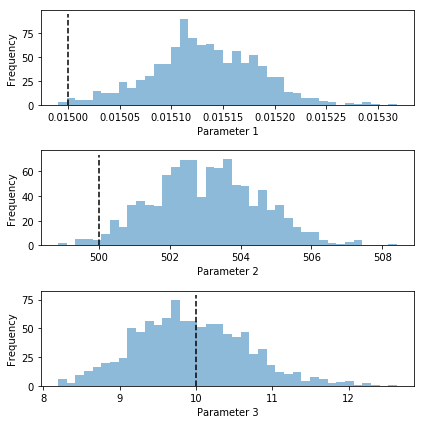

In [8]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


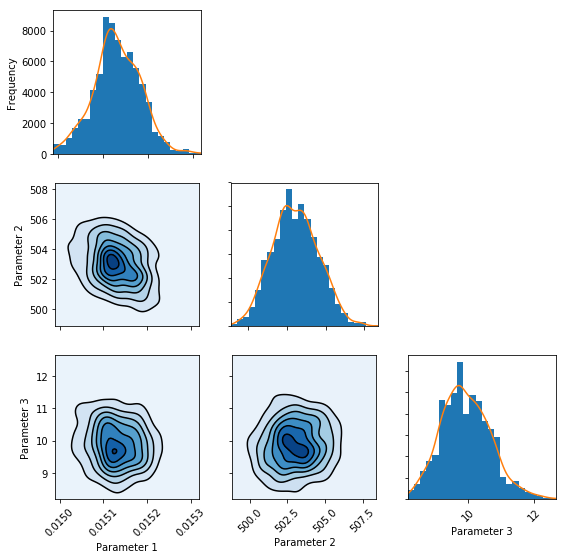

In [9]:
vTheta = samples[0]
pints.plot.pairwise(samples, kde=True)

plt.show()

## Plot posterior predictive simulations versus the observed data

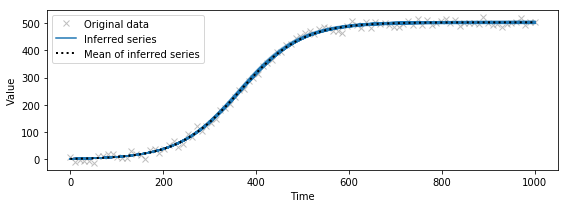

In [10]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [11]:
print('marginal log-likelihood = ' + str(marginal_log_likelihood))

marginal log-likelihood = -379.33826392706317
